## Problem Statement:
* This dataset contains information about used cars listed on www.cardekho.com. Based on the 8 features available, we need to predict the selling price of cars.
* **Selling_Price** - is the **Target variable**.

### Data Dictionary:
* Name : Name of the cars
* Year : Year of the car when it was bought.
* Km_Driven : Number of Kilometres the car is driven.
* Fuel : Fuel type of car (petrol / diesel / CNG / LPG / electric)
* Seller_Type : Tells if a Seller is Individual or a Dealer
* Transmission : Gear transmission of the car (Automatic/Manual)
* Owner : Number of previous owners of the car.
* Present_Price: the current ex-showroom price of the car.
* Selling_Price : Price at which the car is being sold.

**Data Source:** https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

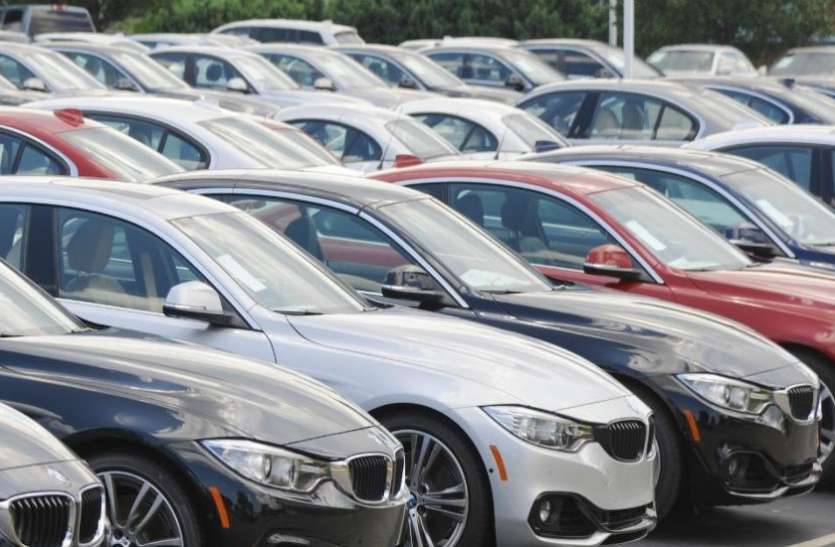

In [1]:
from IPython.display import Image
img = 'cars.jpg'
Image(filename = img)

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

## 2. Import the Dataset

In [3]:
df = pd.read_csv('car_dekho_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 3. Data Exploration

In [4]:
# check data dimension
df.shape

(301, 9)

In [5]:
# display variable names
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# check concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# check data type of each column
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
# check for presence of missing/null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# summary statistics for numeric variables
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# check number of distinct observations in each column
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

### 3.1 Analysing each Variable & their relationships

There are two types of features we have:-
1. **Categorical** 
2. **Numerical**

### 3.1.1 Univariate Analysis:
* Analysing each variable at a time.

In [11]:
# categorical columns
cat_cols = df.select_dtypes("object")
cat_cols.columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [12]:
# Numerical columns
num_cols = df.select_dtypes("number")
num_cols.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

***Categorical features***

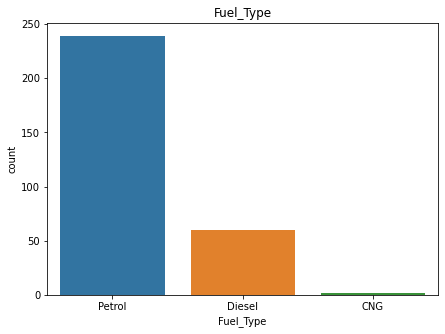

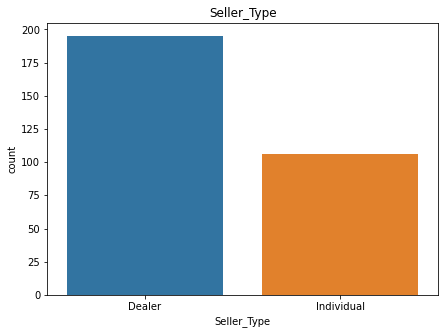

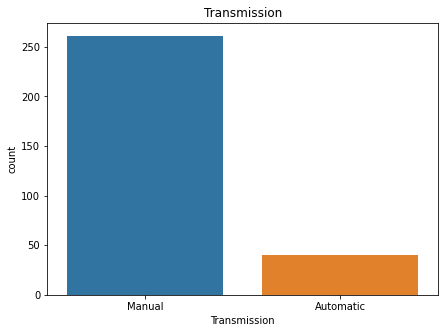

In [13]:
# Plotting countplots for categorical variables

categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
for column in categorical_features:
    plt.figure(figsize=(7,5))
    sns.countplot(x= df[column])
    plt.title(column)
    plt.show()

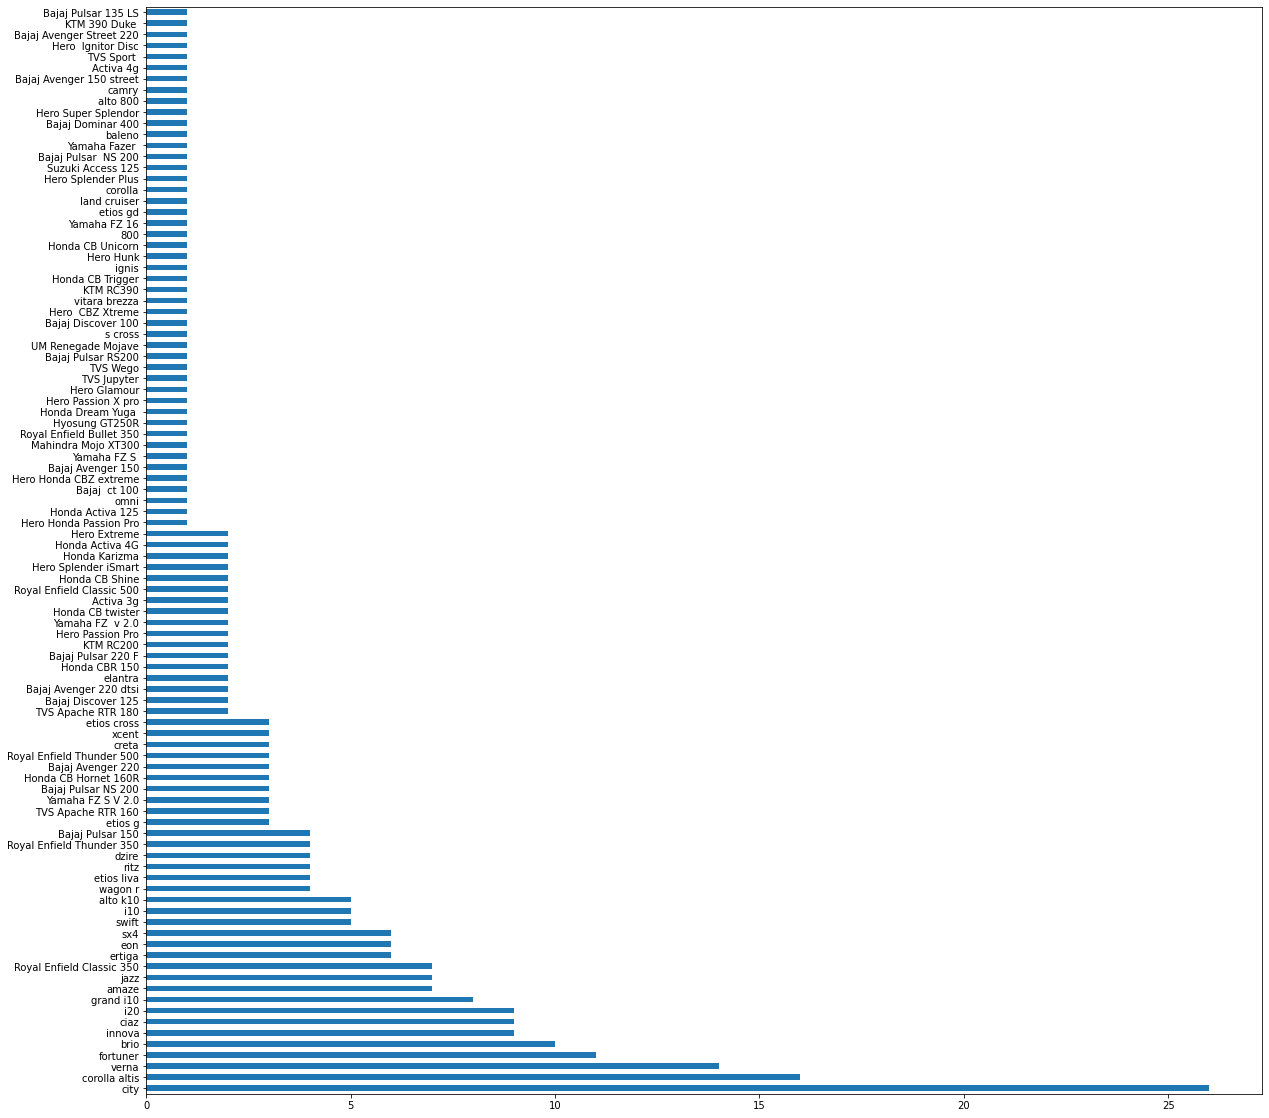

In [14]:
# horizontal bar plot to display car_names & their count

plt.figure(figsize=(20,20))
df['Car_Name'].value_counts().plot(kind = 'barh')
plt.show()

***Numerical features***

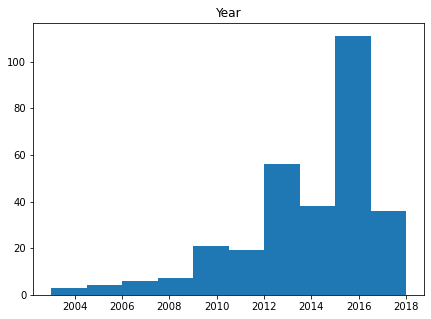

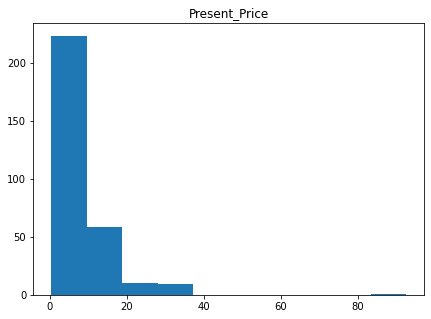

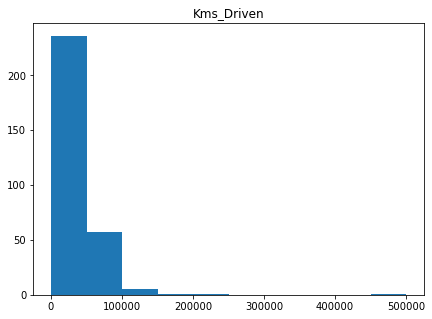

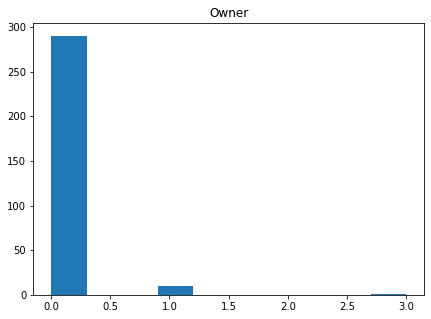

In [15]:
# plotting histogram to check distribution of Numerical variables

numeric_features = ['Year', 'Present_Price', 'Kms_Driven','Owner']
for feature in numeric_features:
    plt.figure(figsize=(7,5))
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

***Target Variable - Selling Price***

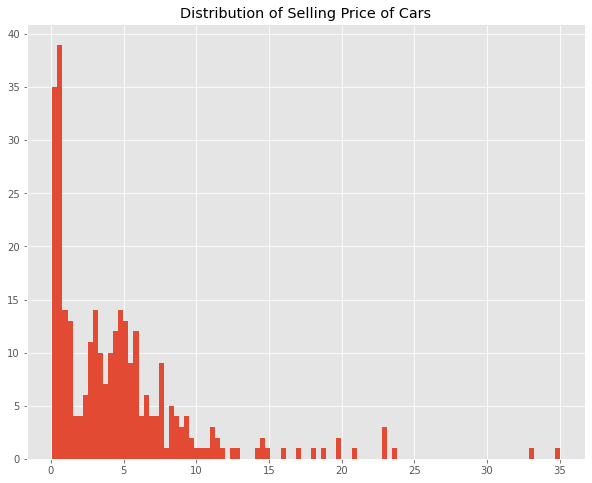

In [16]:
# distribution of - Selling_Price

plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.hist(df['Selling_Price'], bins=100)
plt.title('Distribution of Selling Price of Cars')
plt.show()

In [17]:
# checking the skewness & kurtosis of target variable- selling price

print ("Skew is:", df['Selling_Price'].skew())
print("Kurtosis:", df['Selling_Price'].kurt())

Skew is: 2.493422417797524
Kurtosis: 8.902969520217013


### 3.1.2 Bivariate Analysis
* Analysing relationships between each variable & Target variable.

### a) Target v/s Independent variables (Numerical)

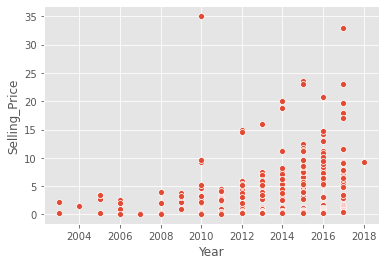

In [18]:
# scatter plot between 'Year' and selling price
sns.scatterplot(data= df, x= 'Year', y= "Selling_Price")

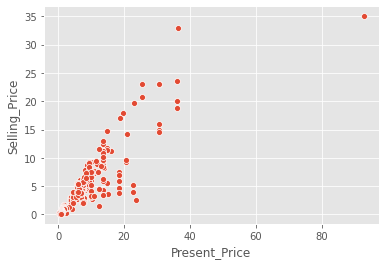

In [19]:
# scatter plot between 'Present_Price' and selling price
sns.scatterplot(data= df, x= 'Present_Price', y= "Selling_Price")

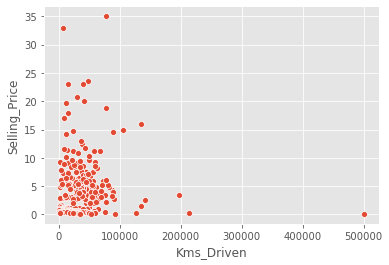

In [20]:
# scatter plot between 'Kms_Driven' and selling price
sns.scatterplot(data= df, x= 'Kms_Driven', y= "Selling_Price")

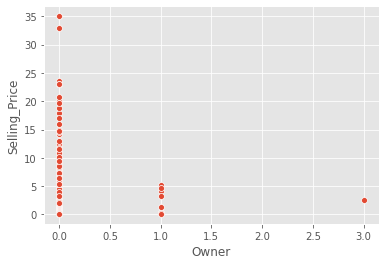

In [21]:
# scatter plot between 'Owner' and selling price
sns.scatterplot(data= df, x = 'Owner', y = "Selling_Price")

### b. Correlation

In [22]:
# creating correlation matrix
corrmat = df.corr().round(2)
corrmat

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.00,0.24,-0.05,-0.52,-0.18
Selling_Price,0.24,1.00,0.88,0.03,-0.09
Present_Price,-0.05,0.88,1.00,0.20,0.01
Kms_Driven,-0.52,0.03,0.20,1.00,0.09
Owner,-0.18,-0.09,0.01,0.09,1.00


In [23]:
# correlation coefficient of numeric variables with target in descending order
print(corrmat['Selling_Price'].round(2).sort_values(ascending = False))

Selling_Price    1.00
Present_Price    0.88
Year             0.24
Kms_Driven       0.03
Owner           -0.09
Name: Selling_Price, dtype: float64


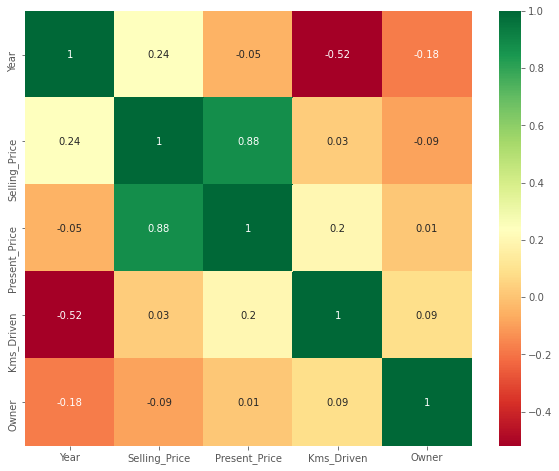

In [24]:
#creating heat map 

plt.figure(figsize=(10,8)) 
sns.heatmap(corrmat, annot = True, cmap="RdYlGn")

### c. Outlier Detection

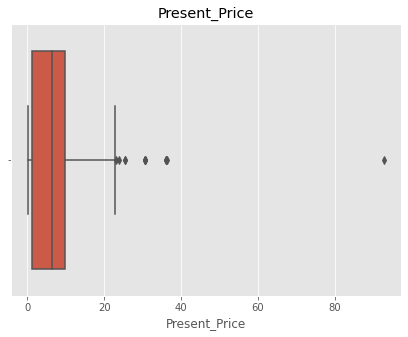

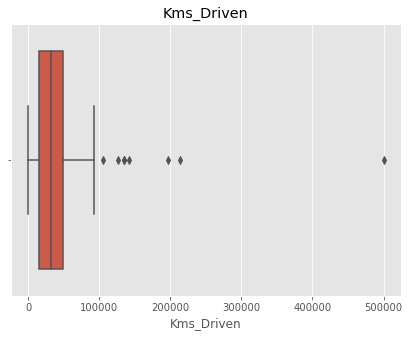

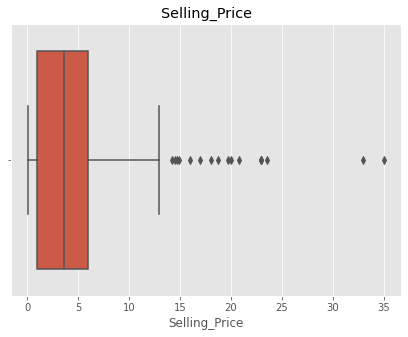

In [25]:
numeric_features = ['Present_Price', 'Kms_Driven', 'Selling_Price']
for feature in numeric_features:
    plt.figure(figsize=(7,5))
    sns.boxplot(x = df[feature])
    plt.title(feature)
    plt.show()

### D. Target v/s Independent Variables (Categorical)

In [26]:
# Median selling price of car based on 'Fuel_Type', 

Fuel_Type_pivot = df.pivot_table(index='Fuel_Type', values="Selling_Price", aggfunc=np.median)
print(Fuel_Type_pivot)

           Selling_Price
Fuel_Type               
CNG                 3.10
Diesel              7.75
Petrol              2.65


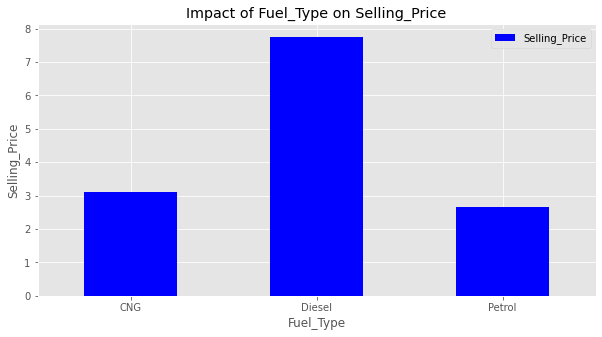

In [27]:
Fuel_Type_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Fuel_Type")
plt.ylabel("Selling_Price")
plt.title("Impact of Fuel_Type on Selling_Price")
plt.xticks(rotation= 0)
plt.show()   

### Observations:
* Average selling price of **Diesel** cars are higher than CNG & Petrol cars.
* Average selling price of Petrol cars are lowest.

In [28]:
# # Median selling price of car based on 'Seller_Type', 

Seller_Type_pivot = df.pivot_table(index='Seller_Type', values="Selling_Price", aggfunc=np.median)
print(Seller_Type_pivot)

             Selling_Price
Seller_Type               
Dealer               5.250
Individual           0.515


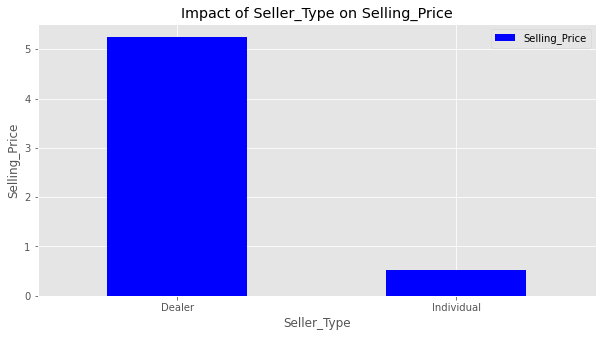

In [29]:
Seller_Type_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Seller_Type")
plt.ylabel("Selling_Price")
plt.title("Impact of Seller_Type on Selling_Price")
plt.xticks(rotation= 0)
plt.show()   

### Observations:
* Average selling price of cars sold by **Dealers** are **higher** compared to individual car sellers.

In [30]:
# # Median selling price of car based on 'Transmission

Transmission_pivot = df.pivot_table(index='Transmission', values="Selling_Price", aggfunc=np.median)
print(Transmission_pivot) 

              Selling_Price
Transmission               
Automatic              5.80
Manual                 3.25


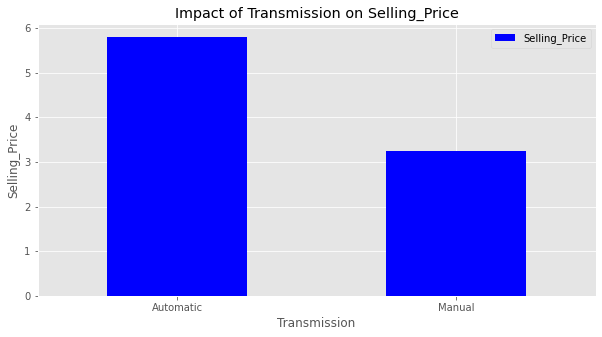

In [31]:
Transmission_pivot.plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel("Transmission")
plt.ylabel("Selling_Price")
plt.title("Impact of Transmission on Selling_Price")
plt.xticks(rotation=0)
plt.show()   

### Observations:
* Average selling price of **Automatic Transmission cars**  are **higher** compared to manual Transmission cars.

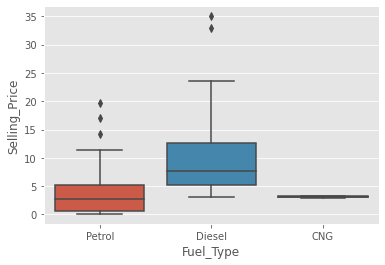

In [33]:
# box plot to show case relationship between  - fuel_type & selling price
sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price', data = df)

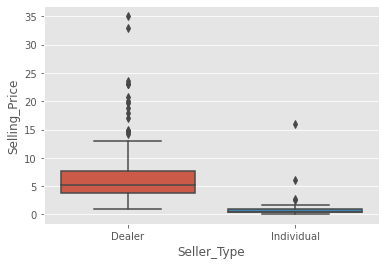

In [34]:
# box plot to show case relationship between  - seller_type & selling price
sns.boxplot(x = 'Seller_Type', y = 'Selling_Price', data = df)

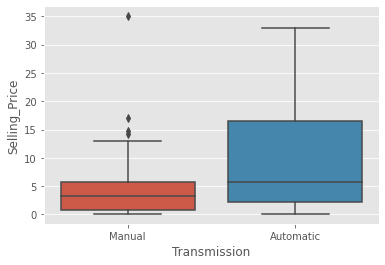

In [35]:
# box plot to show case relationship between  - transmission & selling price
sns.boxplot(x = 'Transmission', y = 'Selling_Price', data = df)

## 4. Feature Engineering
* Delete unwanted columns
* New feature Creation.
* Encoding Categorical Features.

### 4.1 Delete unwanted column( Car_Names)

In [36]:
# dropping 'Car_Name' feature 
df = df.drop(columns = ['Car_Name'], axis = 1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 4.2 New Feature Creation

In [37]:
# creating a new feature "Current_Year" & putting current year value as '2020'
df['Current_Year'] = 2020
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [38]:
# creating a new feature "car_age by subtracting year when car was bought from current year
df['Car_Age'] = df['Current_Year'] - df['Year']
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [39]:
# dropping the redundant fetaures - 'Year', 'Current_Year'
df = df.drop(columns = ['Year', 'Current_Year'], axis = 1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### 4.3 Encoding Categorical Features

In [40]:
# one-hot encoding the categorical features
df = pd.get_dummies(df, drop_first = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [41]:
# checking dimesion of the data 
df.shape

(301, 9)

In [42]:
# check if all variables are numeric or not 
df.dtypes

Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
Car_Age                     int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

## 5. Defining Target & features

In [43]:
X = df.drop(['Selling_Price'], 1)
y = df['Selling_Price']

In [44]:
# check top 5 rows of features
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [45]:
# # check top 5 rows of target
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## 6. Feature Importance
* find out what are the important features which are impacting target.
* visualize them and arrange in descending order.

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
# initialize the model
model = ExtraTreesRegressor()
# fit the model
model.fit(X,y)

ExtraTreesRegressor()

In [47]:
print(model.feature_importances_)

[0.38932801 0.04199123 0.00090598 0.07690071 0.22295493 0.01052846
 0.10996772 0.14742297]


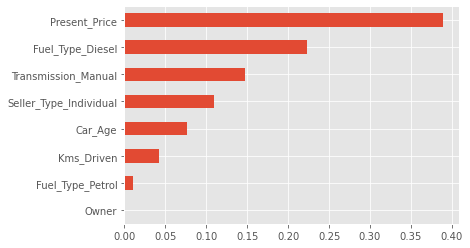

In [48]:
# visualizing features in descending order as per their importance 
imp_features = pd.Series(model.feature_importances_, index = X.columns)
imp_features.sort_values().plot(kind = "barh")
plt.show()

### Observations:
* Most important feature is  **present_price of the car** , followed by , fuel_type_diesel, & Transmission_manual.

## 7. Train -Test split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [50]:
X_train.shape, X_test.shape

((240, 8), (61, 8))

In [51]:
y_train.shape, y_test.shape

((240,), (61,))

## 8. Model Building

### 8.1. Linear Regression 

In [52]:
# initialize the model
reg = LinearRegression()

# fit the model
reg.fit(X_train, y_train)

LinearRegression()

In [53]:
# make prediction
predictions = reg.predict(X_test)

In [54]:
# calculating mean absolute error
print('MAE:', mean_absolute_error(y_test, predictions))

MAE: 1.3229036188525356


### Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
reg_cv = cross_val_score(reg, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

In [56]:
reg_cv_score = - reg_cv 
reg_cv_score

array([1.21495163, 2.46131676, 1.42585447, 1.41089497, 0.77558419])

In [57]:
# average score for 5 fold cross validation 
np.mean(reg_cv_score)

1.4577204049846029

### 8.2. Decision Tree

In [58]:
# initialize the  model 
dt = DecisionTreeRegressor()  

# fit the model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
# make prediction
dt_predictions = dt.predict(X_test)

In [60]:
# calculating mean absolute error
print('MAE:', mean_absolute_error(y_test, dt_predictions))

MAE: 0.6373770491803278


### Cross Validation

In [61]:
# 5-fold cross validation
dt_cv = cross_val_score(dt, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

In [62]:
# calculating scores
dt_cv_score = - dt_cv 
dt_cv_score

array([0.9542623 , 2.3695    , 0.28716667, 0.68416667, 1.04466667])

In [63]:
# average score for 5 fold cross validation 
np.mean(dt_cv_score)

1.0679524590163936

### 8.3. Random Forest 

In [64]:
# initialize the model
rf = RandomForestRegressor()
# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
# make prediction
rf_predictions = rf.predict(X_test)

In [66]:
# calculating mean absolute error
print('MAE:', mean_absolute_error(y_test, rf_predictions))

MAE: 0.5550147540983607


### Cross Validation

In [67]:
# 5-fold cross validation
rf_cv = cross_val_score(rf, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

In [68]:
# calculating scores
rf_cv_score = - rf_cv 
rf_cv_score

array([0.62739508, 1.95954667, 0.25963667, 0.51422333, 0.87351833])

In [69]:
# average score for 5 fold cross validation 
np.mean(rf_cv_score)

0.8468640163934426

## 9. Hyper-Parameter Tuning

In [70]:
# performning Randomized Search CV 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [71]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
# initialize the model 
rf_reg = RandomForestRegressor()

In [73]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf_reg,
                               param_distributions = random_grid,
                               scoring='neg_mean_absolute_error',
                               n_iter = 10,
                               cv = 5,
                               verbose = 0,
                               random_state= 13,
                               n_jobs = -1)

In [74]:
# fit the model
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=13, scoring='neg_mean_absolute_error')

In [75]:
# obtain the best parameters 
rf_random.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [76]:
# check the best score 
rf_random.best_score_

-0.8496789841528283

In [77]:
# make prediction on validtion data
final_predictions = rf_random.predict(X_test)

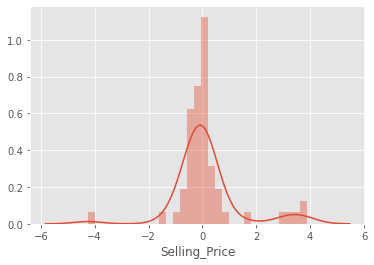

In [78]:
# plotting actual and predicted values to check normal distribution 
sns.distplot(y_test - final_predictions)

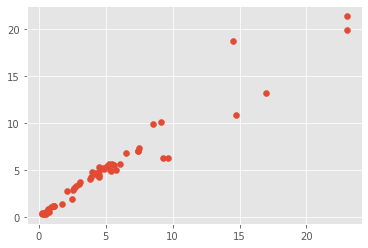

In [79]:
# scatter plot - actual and predicted values
plt.scatter(y_test, final_predictions)

## 10. Model Evaluation

In [80]:
print('MAE:', mean_absolute_error(y_test,final_predictions))
print('MSE:', mean_squared_error(y_test, final_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test,final_predictions)))

MAE: 0.6504146106298903
MSE: 1.465840884709782
RMSE: 1.2107191601316063


## 11. Saving the Model

In [81]:
import pickle
# open a file, where you want to store the data
file = open('rf_car_pred_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)